In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('sat_gpa_v1.csv')

# Check for cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [7]:
df.describe()

,sat_sum,fy_gpa
count,1000.000000,1000.000000
mean,1033.290000,2.467950
std,142.873681,0.740805
min,530.000000,0.000000
25%,930.000000,1.980000
50%,1030.000000,2.465000
75%,1130.000000,3.020000
max,1440.000000,4.000000


In [10]:
df.isna().sum()

sat_sum    0
fy_gpa     0
dtype: int64

In [12]:
df.duplicated().sum()

49

In [18]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  951 non-null    int64  
 1   fy_gpa   951 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 22.3 KB


# Visualization

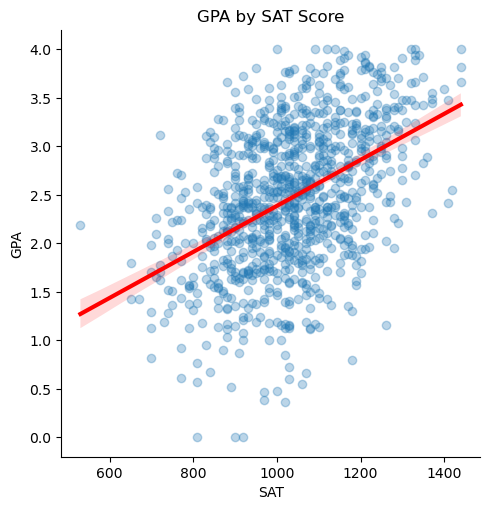

In [105]:
sns.lmplot(data=df, x='sat_sum', y="fy_gpa", scatter_kws={'alpha':.3}, line_kws={'color': 'red', 'linewidth': 3})
plt.title('GPA by SAT Score')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

There is a significant relationship between x and y variables. As shown above, the line of best fit shows a positive
correlation between SAT and college GPA.

# Create our training and testing sets

In [75]:
x = df[['sat_sum']]
x

,sat_sum
0,1270
1,1220
2,1160
3,950
4,1070
...,...
993,1140
994,1040
997,1140
998,1200


In [77]:
y = df['fy_gpa']
y

0      3.18
1      3.33
2      3.25
3      2.42
4      2.63
       ... 
993    2.40
994    2.42
997    3.17
998    1.94
999    2.38
Name: fy_gpa, Length: 951, dtype: float64

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Train the model

In [71]:
model = LinearRegression()
model

LinearRegression()

In [73]:
model.fit(x_train, y_train)

LinearRegression()

# Test model performance

In [87]:
y_pred = model.predict(x_test)
pd.Series(y_pred)

0      2.504379
1      2.668468
2      2.012114
3      2.574703
4      2.785674
         ...   
186    2.855998
187    3.137292
188    2.996645
189    2.504379
190    3.090410
Length: 191, dtype: float64

In [112]:
y_test

200    3.52
426    1.43
717    2.18
783    2.49
519    2.67
       ... 
33     3.92
31     3.48
735    3.29
301    2.21
633    3.48
Name: fy_gpa, Length: 191, dtype: float64

# Measure accuracy of the model

In [89]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.46594232631780197
R-squared: 0.2116416683424427
